In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets.samples_generator import make_blobs
from sklearn.svm import SVC
import scikitplot as skplt
from IPython.display import Image

C:\Users\julia.hammes\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
def plot_svc_decision_function(model, margin=False, ax=None, plot_support=False):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    if margin == False:
        # plot decision boundary
        ax.contour(X, Y, P, colors='k',
                   levels=[0], alpha=0.5,
                   linestyles=['-'])
    else:
        # plot decision boundary and margins
        ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    
  
    #plot support vectors
        if plot_support:
            ax.scatter(model.support_vectors_[:, 0],
                       model.support_vectors_[:, 1],
                       s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

# Capítulo 9 - Support Vector Machines

## Hiperplano

Em um espaço p-dimensional o hiperplano é um sub espaço afinado plano do hiperplano dimensão p-1.
Em um espaço tridimensional um hiperplano é um plano.
Em um espaço bidimensional, um hiperplano é uma reta. 
Em um espaço unidimensional, um hiperplano é um ponto

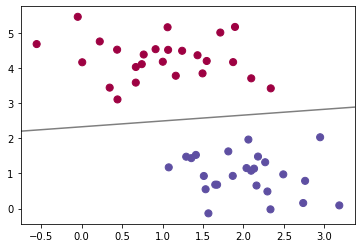

In [3]:
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)

model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='Spectral')
plot_svc_decision_function(model);

Em duas dimensões um hiperplano é definido pela equação:

                  β0 + β1X1 + β2X2 = 0
                  
A equação pode ser extendida para o espaço p-dimensional:
                  
                  β0 + β1X1 + β2X2 + ...+ βpXp = 0

## 9.1.2 - Classificação usando um hiperplano

Suponhamos que temos um conjunto da dados com 2 classes, onde -1 representa uma classe e 1 representa a outra classe. Então um hiperplano de separação tem a propriedade que:

                β0 + β1xi1 + β2xi2 + ...+ βpxip > 0 if yi = 1,
e

                β0 + β1xi1 + β2xi2 + ...+ βpxip < 0 if yi = −1

## 9.1.3 - Maximal Margin Classifier

Como podemos ter vários hiperplanos que separam os dados conforme imagem abaixo. Precisamos decidir qual hiperplano será usado.
Uma escolha natural é o hiperplano de margem máxima, ou seja o hiperplano que melhor separa é o mais distante das observações de treinamento.

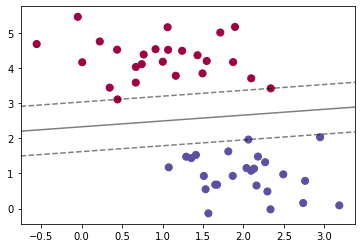

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='Spectral')
plot_svc_decision_function(model,  margin=True, plot_support=True);

## 9.1.4 - Construtor Maximal Margin Classifier

Problema de otimização é encontrar os coeficientes que maximizem a margem.

In [6]:
Image(url = 'img/img05.png')

Na figura abaixo podemos ver que a adição de uma única observação no painel direito leva a uma grande mudança no hiperplano.

In [7]:
Image(url = 'img/img04.png')

## 9.2 - Support Vector Classifier

#### Solução do problema de otimização

No support vector classifier C é um parâmetro de ajuste não negativo.
ε1,...,εn irão permitir que observações estejam no lado errado da margem ou do hiperplano.
εi nos diz onde a ith observação está localizada em relação ao hiperplano. Se εi = 0 a observação está no lado correto do margem. Se εi > 0 então a observação está no lado errado da margem e se εi > 1 então a observação está no lado errado do hiperplano.
Aqui C limita a soma dos εi's e assim determina a quantidade de violações na margem que toleramos.

In [8]:
Image(url = 'img/img06.png')

#### Support Vector Classifier sendo treinado usando diferentes valores de C

In [9]:
Image(url = 'img/img07.png')

O Support Vector Classifier é uma escolha natural quando temos 2 classes e se o limite entre as duas classes for linear.
Mas na prática muitas vezes nos deparamos com limites não lineares.

### Casos não linearmente separaveis

In [10]:
Image(url = 'img/img08.png')

#### Solução para o Support Vector Classifier

Por exemplo, ao invés de treinar um support vector classiﬁer usando p features:
                     
                     X1,X2,...,Xp

Poderiamos treinar o support vector classiﬁer usando 2p features:
                     
                     X1,X1²,X2,X2²,...,Xp,Xp²



### Exemplo

In [11]:
Image(url = 'img/img12.png')

## 9.3 - Support Vector Machines

As SVMs são uma extensão dos Support Vector Classifier que resulta da ampliação do espaço das features de uma maneira específica, usando Kernels.

Quando utilizado Kernel Linear o resultado será igual ao Support Vector Classifier, quando o Support Vector Classifier é combinado com uma função de Kernel não linear o resultado é conhecido como Support Vector Machine.

In [12]:
Image(url = 'img/img14.png')

### Linear Kernel

In [13]:
Image(url = 'img/img15.png')

### Polynomial Kernel

Eleva o espaço das features para um espaço d-dimensional, aplicando uma função polinomial de grau d, sendo d > 1.

In [14]:
Image(url = 'img/img13.png')

### Radial Kernel

O Radial Kernel verifica a distância Euclidiana da observação de teste e as observações de treinamento, sendo que as observações muito distantes não terão influencia sobre a classificação daquela observação de teste. Isso significa que o kernel radial terá um comportamento muito local, sendo que somente as observações de treinamento próximas influenciarão na classe da observação de teste.

In [15]:
Image(url = 'img/img16.png')

In [16]:
Image(url = 'img/img20.png')

## 9.4 - SVMs com mais de 2 classes

### 9.4.1 - Classificação One-Versus-One

Nessa abordagem para utilizar SVMs onde existem classes K > 2, serão necessárias K(K -1)/2 SVMs, cada uma das quais compara um par de classes.
Por exemplo, um dos classificadores compara a classe codificada como +1 com a classe codificada como -1.
Classificamos cada observação de teste usando cada um dos classificadores e contabilizamos o número de vezes que a observação de teste é atribuída a cada classe K. A classificação final é realizada atribuindo a observação de teste à classe à qual foi atribuída com mais frequência nessas classificações em pares.

### 9.4.2 Classificação One-Versus-All

Nessa abordagem teremos K classificadores, realizaremos o treinamento de K SVMs, cada vez comparando uma das K classes com  as K-1 restantes.
Cada classificador terão os parametros β0k,β1k,...,βpk, que são o resultado do treinamento da classe K representada por +1 com o restante das classes representadas por -1.
Atribuiremos a observação x de teste para classe cujo resultado de β0k +β1k*x1 +β2k *x2 +...+ βpk*xp seja maior.

## 9.5 - Relação com Regressão Logística

#### Hinge Loss

A função de hinge loss está intimamente relacionada à função de perda usada na regressão logística. Uma característica interessante do classificador de vetores de suporte é que apenas os vetores de suporte desempenham um papel no classificador obtido, as observações do lado correto da margem não a afetam. Isso se deve ao fato de que a função de perda é exatamente zero para observações para as quais yi (β0 + β1xi1 + ... + βpxip) ≥ 1, elas correspondem a observações que estão do lado correto da margem. Em contraste, a função de perda para regressão logística não é exatamente zero em nenhum lugar. Mas é muito pequeno para observações que estão longe do limite de decisão. 

Devido às semelhanças entre suas funções de perda, a regressão logística e o classificador de vetores de suporte geralmente fornecem resultados muito semelhantes. Quando as classes são bem separadas, os SVMs tendem a se comportar melhor do que a regressão logística, em regimes mais sobrepostos, a regressão logística é frequentemente preferida.

In [17]:
Image(url = 'img/img19.png')

## 9.6 Lab: Support Vector Machines

### Support Vector Classifier

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [19]:
#Gerando dados randômicos
np.random.seed(1)
X = np.random.normal(0, 1, (20, 2))
y = np.repeat([1,-1], 10)
X[y == -1, :] = X[y == -1, :] +1

In [20]:
#Transformando em DataFrame
df_X = pd.DataFrame(data=X, columns=['X1', 'X2'])
df_y = pd.DataFrame(data=y, columns=['y'])

df = pd.concat([df_X, df_y], axis=1)
df.head()

,X1,X2,y
0,1.624345,-0.611756,1
1,-0.528172,-1.072969,1
2,0.865408,-2.301539,1
3,1.744812,-0.761207,1
4,0.319039,-0.249370,1


Verificar se os dados são linearmente separáveis

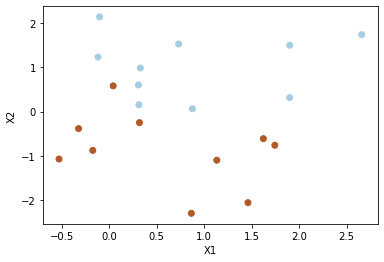

In [21]:
plt.scatter(df['X1'], df['X2'],c=df['y'], cmap=plt.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

### Linear Kernel

No sklearn podemos usar o SVC() com o parametro kernel = linear para treinar o support vector classifier. O parametros de custo C nos permite especificar a violação da margem.
Quando o custo for pequeno, então a margem será grande e muitos vetores de suporte estarão na margem ou violarão a margem.

#### SVC com C = 1.0

Os vetores de suporte são plotados como + e as demais observações são plotadas em círculos.

Quantidade de vetores de suporte:  9


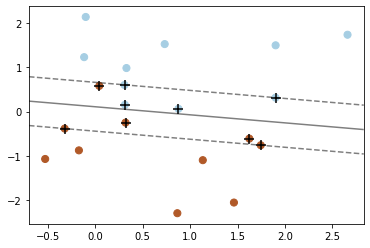

In [22]:
# Support Vector Classifier com kernel linear.
svc = SVC(C= 1.0, kernel='linear')
svc.fit(X, y);

vs = svc.support_vectors_
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.Paired)
plt.scatter(vs[:,0], vs[:,1], c='k', marker='+', s=100, linewidths='1')
plot_svc_decision_function(svc, margin=True, plot_support=True);
print('Quantidade de vetores de suporte: ', svc.support_.size)

#### SVC com C = 0.1

Agora que um valor menor do parâmetro C está sendo usado, obtemos um número maior de vetores de suporte, porque a margem agora é maior.

Quantidade de vetores de suporte:  15


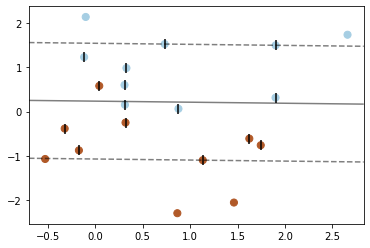

In [23]:
# Quando usamos o valor de C menor a margem é maior.
svc2 = SVC(C=0.1, kernel='linear')
svc2.fit(X, y)

vs = svc2.support_vectors_
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.Paired)
plt.scatter(vs[:,0], vs[:,1], c='k', marker='|', s=100, linewidths='1')
plot_svc_decision_function(svc2, margin=True, plot_support=True);
print('Quantidade de vetores de suporte: ', svc2.support_.size)

Usamos GridSearch para comparar SVMs com kernel linear, usando diferentes valores para o parâmetro C.

In [24]:
# Selecionando o melhor valor para C com cross validation
tuned_parameters = [{'C': [0.001, 0.01, 0.1, 1,5,10,100]}]
clf = GridSearchCV(SVC(kernel='linear'), tuned_parameters, cv=10, scoring='accuracy', return_train_score=True)
clf.fit(X, y)
clf.cv_results_

{'mean_fit_time': array([0.00068734, 0.00048835, 0.00053294, 0.0004936 , 0.00053902,
        0.00084214, 0.00083826]),
 'std_fit_time': array([0.00063162, 0.00048946, 0.00044548, 0.00046532, 0.00046817,
        0.00037417, 0.00033379]),
 'mean_score_time': array([4.09078598e-04, 4.01473045e-04, 1.78551674e-04, 3.28016281e-04,
        1.82008743e-04, 1.70946121e-05, 7.39598274e-04]),
 'std_score_time': array([5.22239806e-04, 4.91794325e-04, 3.02453518e-04, 4.46596844e-04,
        3.66172056e-04, 5.12838364e-05, 4.05796553e-04]),
 'param_C': masked_array(data=[0.001, 0.01, 0.1, 1, 5, 10, 100],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.001},
  {'C': 0.01},
  {'C': 0.1},
  {'C': 1},
  {'C': 5},
  {'C': 10},
  {'C': 100}],
 'split0_test_score': array([1., 1., 1., 1., 1., 1., 1.]),
 'split1_test_score': array([1., 1., 1., 1., 1., 1., 1.]),
 'split2_test_score': array([1., 1., 1., 1., 1., 1., 1

In [25]:
# 0.001 é o melho valor para C para o GridSearchCV. 
clf.best_params_


{'C': 0.001}

Gerando Dados de Teste

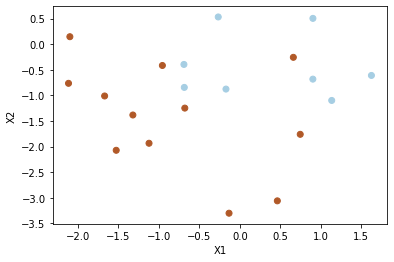

In [26]:
# Gerando dados de teste
np.random.seed(1)
X_test = np.random.randn(20,2)
y_test = np.random.choice([-1,1], 20)
X_test[y_test == 1] = X_test[y_test == 1] -1

plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap=plt.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2');

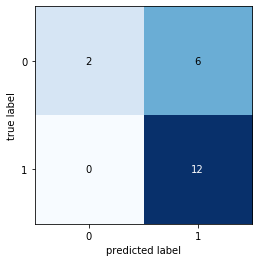

In [27]:
# Modelo com GridShearch : C = 0.001
y_pred = clf.predict(X_test)

from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

plot_confusion_matrix(confusion_matrix(y_test, y_pred));

C = 0.01

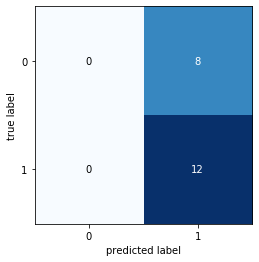

In [28]:
#svc3: C = 0.01
svc3 = SVC(kernel='linear', C=0.01)
svc3.fit(X_test, y_test)

y_pred3 = svc3.predict(X_test)

plot_confusion_matrix(confusion_matrix(y_test, y_pred3));

Mudando os dados de teste onde as classes são separadas linearmente

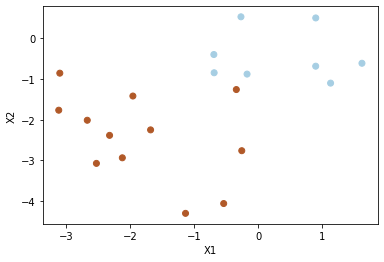

In [29]:
# Alterando os dados de teste onde as classe são linearmente separaveis.
X_test[y_test == 1] = X_test[y_test == 1] -1
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap=plt.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2');

Ajustamos o classificador de vetor de suporte e plotamos o hiperplano resultante, usando um valor muito alto de custo para que nenhuma observação seja classificada incorretamente

Nenhum erro de treinamento foi cometido e apenas dois vetores de suporte foram utilizados. Contudo, podemos ver pela figura que a margem é muito estreita (porque as observações que não são vetores de suporte, indicadas como +, são muito
próximo ao limite da decisão). Parece provável que este modelo tenha um desempenho ruim nos dados de teste. Agora tentamos um valor menor de custo

Quantidade de vetores de suporte:  4


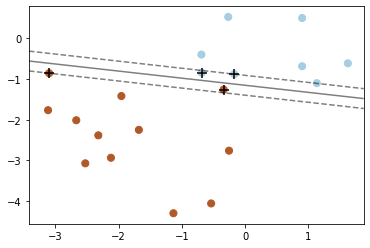

In [30]:
svc4 = SVC(C=10.0, kernel='linear')
svc4.fit(X_test, y_test)

vs = svc4.support_vectors_
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=50, cmap=plt.cm.Paired)
plt.scatter(vs[:,0], vs[:,1], c='k', marker='+', s=100, linewidths='1')
plot_svc_decision_function(svc4, margin=True, plot_support=True);
print('Quantidade de vetores de suporte: ', svc4.support_.size)

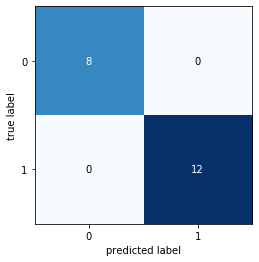

In [31]:
y_pred4 = svc4.predict(X_test)

plot_confusion_matrix(confusion_matrix(y_test, y_pred4));

### Support Vector Machine

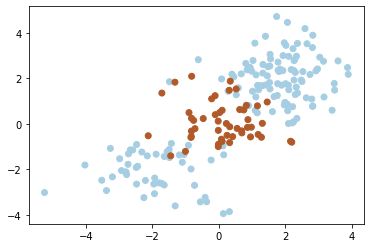

In [32]:
np.random.seed(42)

X = np.random.normal(size=400).reshape(200, 2)
X[0:100, :] += 2
X[100:150, :] -= 2
y = np.concatenate((np.full(150, 1, dtype=np.int64), np.full(50, 2, dtype=np.int64)))

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired);

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, test_size=0.5, random_state=42)

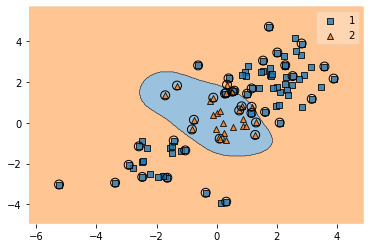

In [34]:
from mlxtend.plotting import plot_decision_regions

svm = SVC(kernel='rbf', gamma=1, C=1)
svm.fit(X_train, y_train)

plot_decision_regions(X_train, y_train, clf=svm, X_highlight=svm.support_vectors_);

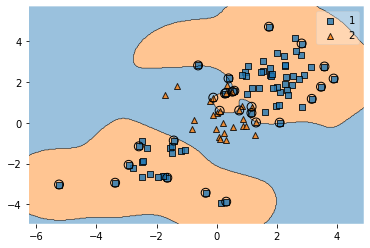

In [35]:
svm2 = SVC(kernel='rbf', gamma=1, C=100000)
svm2.fit(X_train, y_train)

plot_decision_regions(X_train, y_train, clf=svm2, X_highlight=svm2.support_vectors_);

In [36]:
svm3 = SVC(kernel='rbf')
c_space = np.array([0.1, 1, 10, 100, 1000])
g_space = np.array([0.5, 1, 2, 3, 4])
param_grid = {'C': c_space, 'gamma': g_space}

tune = GridSearchCV(svm3, param_grid, cv=10)
tune.fit(X_train, y_train)

tune.cv_results_
tune.best_params_

{'C': 1.0, 'gamma': 0.5}

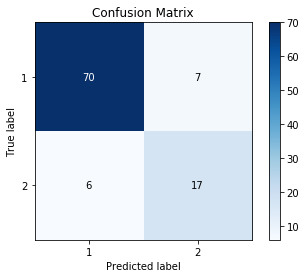

In [37]:
y_pred = tune.predict(X_test)

skplt.metrics.plot_confusion_matrix(y_test, y_pred);

### SVM with Multiple Classes

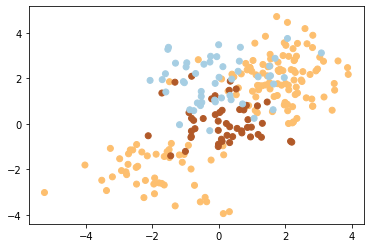

In [38]:
np.random.seed(42)

X = np.random.normal(size=400).reshape(200, 2)
X[0:100, :] += 2
X[100:150, :] -= 2
y = np.concatenate((np.full(150, 1, dtype=np.int64), np.full(50, 2, dtype=np.int64)))

X = np.concatenate((X, np.random.normal(size=100).reshape(50, 2)))
y = np.concatenate((y, np.full(50, 0, dtype=np.int64)))

X[y == 0, 1] += 2

plt.scatter(X[:, 0], X[:, 1], c=y+1, cmap=plt.cm.Paired);

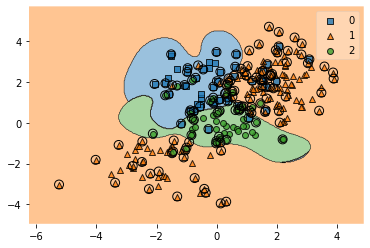

In [39]:
svm_m = SVC(kernel='rbf', C=10, gamma=1)
svm_m.fit(X, y)

plot_decision_regions(X, y, clf=svm_m, X_highlight=svm_m.support_vectors_);

### Application to Gene Expression Data

Esse conjunto de dados consiste em medições de expressão para 2.308 genes.
Iremos utilizar SVM para prever o subtipo de câncer usando medidas de expressão gênica. 
Como o dataset possui muito mais variáveis do que observações utilizaremos o kernel linear, porque a flexibilidade do kernel polinomial ou radial nesse caso não fará diferença.

In [3]:
X_train = pd.read_csv('../../data/raw/Khan_xtrain.csv').drop('Unnamed: 0', axis=1)
y_train = pd.read_csv('../../data/raw/Khan_ytrain.csv').drop('Unnamed: 0', axis=1).values.ravel()
X_test = pd.read_csv('../../data/raw/Khan_xtest.csv').drop('Unnamed: 0', axis=1)
y_test = pd.read_csv('../../data/raw/Khan_ytest.csv').drop('Unnamed: 0', axis=1).values.ravel()

In [42]:
#Verificando a dimensão dos dados
X_train.shape, X_test.shape

((63, 2308), (20, 2308))

In [43]:
# y_train
pd.Series(y_train).value_counts(sort=False)

1     8
2    23
3    12
4    20
dtype: int64

In [44]:
# y_test
pd.Series(y_test).value_counts(sort=False)

1    3
2    6
3    6
4    5
dtype: int64

In [45]:
svc = SVC(kernel='linear')

svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

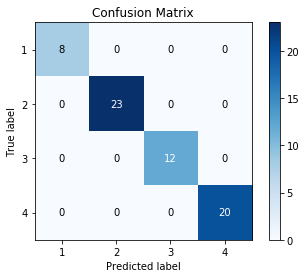

In [46]:
y_pred = svc.predict(X_train)

skplt.metrics.plot_confusion_matrix(y_train, y_pred);

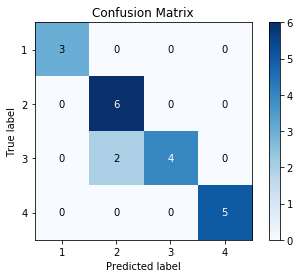

In [47]:
y_pred = svc.predict(X_test)

skplt.metrics.plot_confusion_matrix(y_test, y_pred);

### Sugestões

Canal StatQuest

SVM:
https://www.youtube.com/watch?v=efR1C6CvhmE

SVM parte 2:
https://www.youtube.com/watch?v=Toet3EiSFcM

SVM parte 3:
https://www.youtube.com/watch?v=Qc5IyLW_hns